In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
X = df.drop('sales', axis=1)

In [6]:
y = df['sales']

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [9]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [13]:
poly_features = polynomial_converter.transform(X)

In [15]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [16]:
poly_features.shape

(200, 9)

In [17]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [18]:
#polynomial_converter.fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
test_predictions = model.predict(X_test)

In [27]:
# model.coef_

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [29]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)

In [30]:
MAE

0.48967980448037

In [31]:
RMSE

0.6646431757269196

In [32]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [33]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [35]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [36]:
#create the different order poly
# split poly in train/test
# fit on train
# store/save the rmse for BOTH TRAIN AND TEST
# plot the results (error vs poly order

In [37]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse= np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [38]:
train_rmse_errors


[1.734594124329376,
 0.5879574085292233,
 0.4339344356902067,
 0.35170836883993534,
 0.2509342952029336,
 0.19933332834273104,
 5.4214215994181805,
 0.14237972100695595,
 0.16675080548552418]

In [39]:
test_rmse_errors

[1.5161519375993873,
 0.6646431757269196,
 0.5803286825231453,
 0.5077742624232109,
 2.5758247603435955,
 4.490868529265006,
 1381.404235838588,
 4449.5681972303655,
 95893.0265813161]

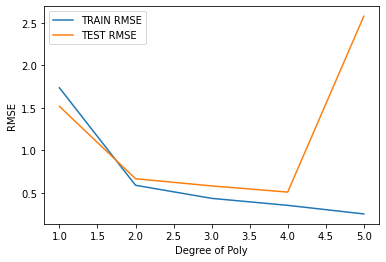

In [44]:
plt.plot(range(1,6), train_rmse_errors[:5], label='TRAIN RMSE')
plt.plot(range(1,6), test_rmse_errors[:5], label="TEST RMSE")
plt.xlabel("Degree of Poly")
plt.ylabel("RMSE")
plt.legend()

In [45]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [46]:
final_model = LinearRegression()

In [47]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [48]:
from joblib import dump,load

In [49]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [50]:
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']

In [51]:
loaded_converter = load('final_converter.joblib')

In [53]:
loaded_model = load('final_poly_model.joblib')

In [54]:
campaign = [[149,22,12]]

In [57]:
transformed_data = loaded_converter.fit_transform(campaign)

In [58]:
loaded_model.predict(transformed_data)

array([14.64501014])